In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

   accX  accY  accZ  gyroX  gyroY  gyroZ  Index
0  0.48 -4.98 -0.59  -0.04   0.01    0.0      0
1  0.50 -5.02 -0.63  -0.04   0.01    0.0      1
2  0.46 -5.00 -0.63  -0.04   0.01    0.0      2
3  0.46 -4.98 -0.56  -0.04   0.01    0.0      3
4  0.42 -5.02 -0.59  -0.04   0.01    0.0      4


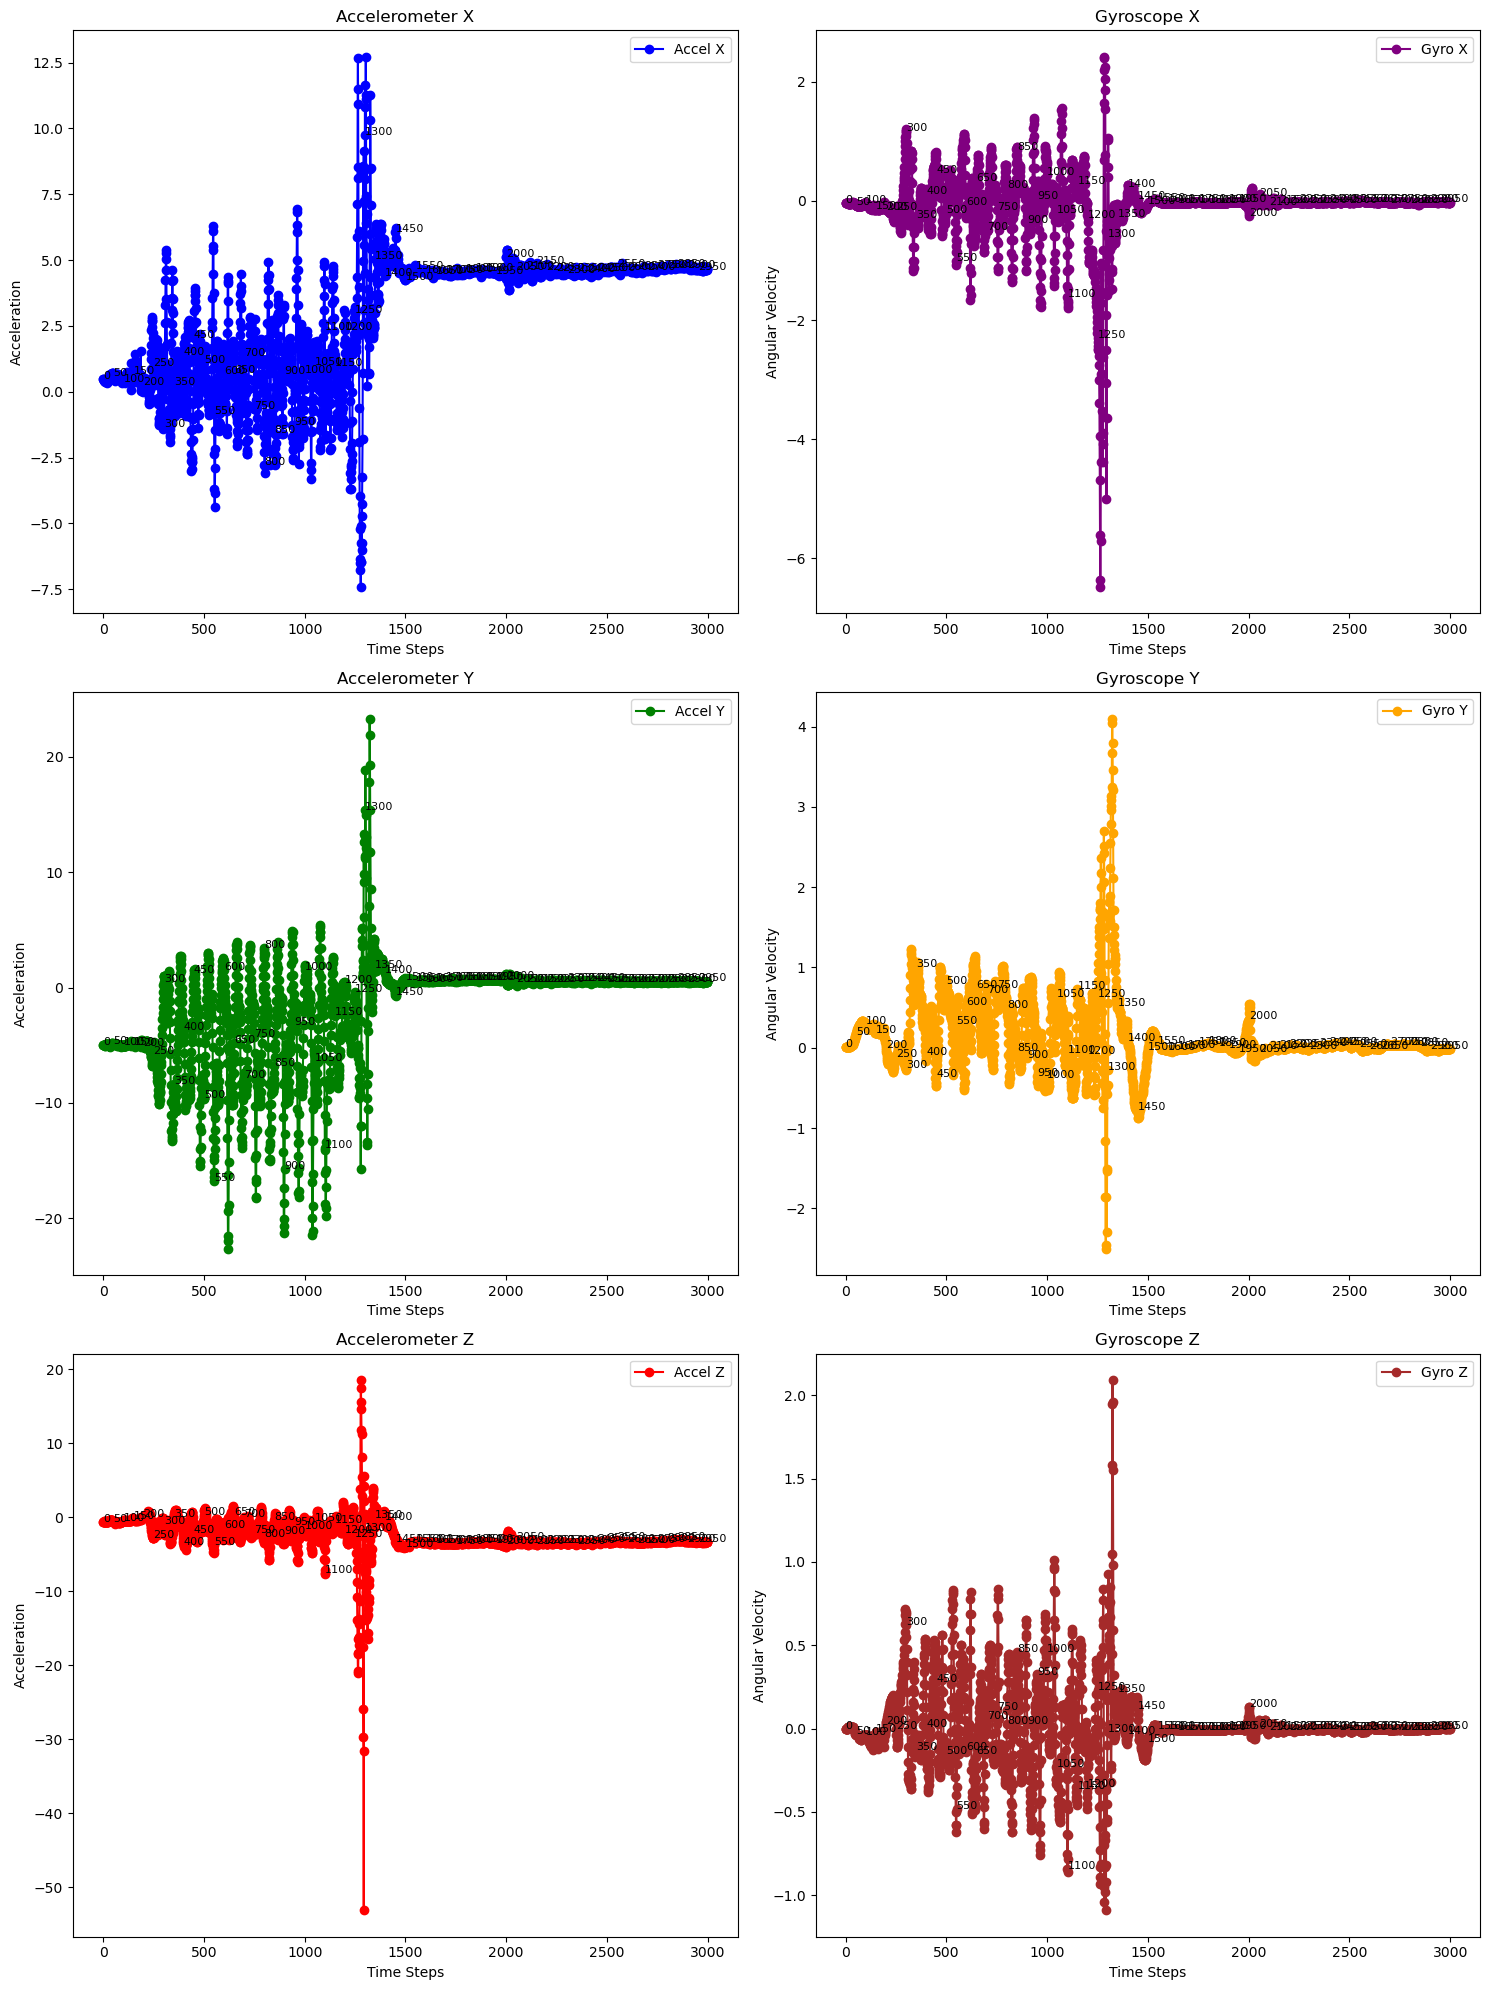

In [231]:
data_path = 'training_data/true/F06_SA03_R05.txt'
str_name = str.split(data_path, "/")
name = str.split(str_name[2], ".")

data = pd.read_csv(data_path)
data['Index'] = data.index

print(data.head())

import matplotlib.pyplot as plt

# Function to plot data with index annotations
def plot_with_index_annotations(x, y, label, color, ylabel, title, subplot_position, annotation_step=50):
    plt.subplot(subplot_position)
    plt.plot(x, y, color=color, label=label, marker='o')  # Added markers for each point
    for i in range(0, len(x), annotation_step):  # Annotate every 'annotation_step'th point
        plt.text(x[i], y[i], f'{x[i]}', fontsize=8)
    plt.xlabel('Time Steps')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

# Plotting accelerometer data with index annotations
plt.figure(figsize=(15, 20))

plot_with_index_annotations(data['Index'], data['accX'], 'Accel X', 'blue', 'Acceleration', 'Accelerometer X', 321)
plot_with_index_annotations(data['Index'], data['accY'], 'Accel Y', 'green', 'Acceleration', 'Accelerometer Y', 323)
plot_with_index_annotations(data['Index'], data['accZ'], 'Accel Z', 'red', 'Acceleration', 'Accelerometer Z', 325)

# Plotting gyroscope data with index annotations
plot_with_index_annotations(data['Index'], data['gyroX'], 'Gyro X', 'purple', 'Angular Velocity', 'Gyroscope X', 322)
plot_with_index_annotations(data['Index'], data['gyroY'], 'Gyro Y', 'orange', 'Angular Velocity', 'Gyroscope Y', 324)
plot_with_index_annotations(data['Index'], data['gyroZ'], 'Gyro Z', 'brown', 'Angular Velocity', 'Gyroscope Z', 326)

plt.tight_layout()
plt.show()

In [232]:
import matplotlib.pyplot as plt

start_index = 1150

end_index = 1600


filtered_data = data[(data['Index'] >= start_index) & (data['Index'] <= end_index)]
filtered_data = filtered_data.drop(columns=['Index'])

print(filtered_data)

      accX  accY  accZ  gyroX  gyroY  gyroZ
1150  0.98 -2.36 -0.71   0.29   0.73  -0.36
1151  0.71 -2.09 -0.57   0.33   0.71  -0.31
1152  0.29 -1.70 -0.40   0.36   0.67  -0.25
1153  0.17 -1.26 -0.19   0.36   0.60  -0.19
1154  0.57 -0.77 -0.11   0.34   0.54  -0.12
...    ...   ...   ...    ...    ...    ...
1596  4.64  0.57 -3.33  -0.03  -0.03  -0.00
1597  4.62  0.54 -3.35  -0.03  -0.03  -0.00
1598  4.58  0.61 -3.37  -0.03  -0.03  -0.00
1599  4.58  0.63 -3.43  -0.03  -0.03  -0.00
1600  4.52  0.52 -3.35  -0.02  -0.03  -0.00

[451 rows x 6 columns]


In [233]:
filtered_data.to_csv("./training_data/fall/"+name[0]+".csv", index=False)